In [1]:
import pandas as pd
import yellowbrick

In [2]:
#Step 1:  Load data into a dataframe
addr1 = "StudentsPerformance.csv"
data = pd.read_csv(addr1)

In [6]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

pandas.core.frame.DataFrame

In [4]:
#Step 3:  Look at the data
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none         NaN            NaN            NaN  


In [5]:
#Step 4:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
       math score  reading score  writing score
count  994.000000     995.000000     994.000000
mean    66.113682      69.194975      68.096579
std     15.173590      14.600521      15.199470
min      0.000000      17.000000      10.000000
25%     57.000000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      79.000000      79.000000
max    100.000000     100.000000     100.000000
Summarized Data
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       642  


In [20]:
# Step 5 - fill in missing values and eliminate features
# fill the missing age data with 0

def fill_na_most(data_reqfeatures, inplace=True):
    return data.fillna(0, inplace=inplace)

fill_na_most(data['math score'])
fill_na_most(data['reading score'])
fill_na_most(data['writing score'])

In [24]:
# Step 6 - Calculating the total score of a student across all the tests
# Creating a new variable totalScore to save the data
for i in data.index:
    data.at[i, 'totalScore'] = 0      
    if data.at[i,'math score'] > 0:
        #print("1: ",data.at[i,'math score'])
        data.at[i, 'totalScore'] = data.at[i, 'totalScore'] + data.at[i,'math score']
        #print("1: ",data.at[i, 'totalScore'])
    if data.at[i,'reading score'] > 0:
        #print("2: ",data.at[i,'reading score'])
        data.at[i, 'totalScore'] = data.at[i, 'totalScore'] + data.at[i,'reading score'] 
        #print("2: ",data.at[i, 'totalScore'])
    if data.at[i,'writing score'] > 0:
        #print("3: ",data.at[i,'writing score'])
        data.at[i, 'totalScore'] = data.at[i, 'totalScore'] + data.at[i,'writing score'] 
        #print("3: ",data.at[i, 'totalScore'])
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none        72.0           72.0           74.0   
1               completed        69.0           90.0           88.0   
2                    none        90.0           95.0           93.0   
3                    none        47.0           57.0           44.0   
4                    none         0.0            0.0            0.0   

   totalScore  
0       218.0  
1       247.0  
2       278.0  
3       148.0  
4         0.0  


In [46]:
# Step 7 - Creating a variable based on the performance on the student
# Adding a cutoff, if
# Total Score of the student is greater than or equal to 225
#      Student Pass
# Else
#      Student Fail
# We will use the Grading as a target variable
for i in data.index:
    if data.at[i, 'totalScore'] >= 225:
        data.at[i, 'grade'] = 'Pass'
    if data.at[i, 'totalScore'] < 225:
        data.at[i, 'grade'] = 'Fail'
print(data.head(5))

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none        72.0           72.0           74.0   
1               completed        69.0           90.0           88.0   
2                    none        90.0           95.0           93.0   
3                    none        47.0           57.0           44.0   
4                    none         0.0            0.0            0.0   

   totalScore grade  
0       218.0  Fail  
1       247.0  Pass  
2       278.0  Pass  
3       148.0  Fail  
4         0.0  Fail  


In [51]:
# Step 8 - convert categorical data to numbers
# get the categorical data
cat_features = ['gender', 'test preparation course','race/ethnicity','parental level of education']
data_cat = data[cat_features]
data_cat = data_cat.replace({'gender': {1: '1st', 2: '2nd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
#print(data_cat_dummies.head())

In [48]:
# Step 9 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['math score','reading score','writing score','totalScore']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'grade': {1: 'Pass', 0: 'Fail'}})['grade']
#data_model_y = data['grade']  

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Pass and Fail
print('\n')
print('No. of Pass and Fail in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Pass and Fail in the validation set:')
print(y_val.value_counts())
#print(y_val)

No. of samples in training set:  700
No. of samples in validation set: 300


No. of Pass and Fail in the training set:
Fail    480
Pass    220
Name: grade, dtype: int64


No. of Pass and Fail in the validation set:
Fail    198
Pass    102
Name: grade, dtype: int64


E:\AnacondaSoft\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


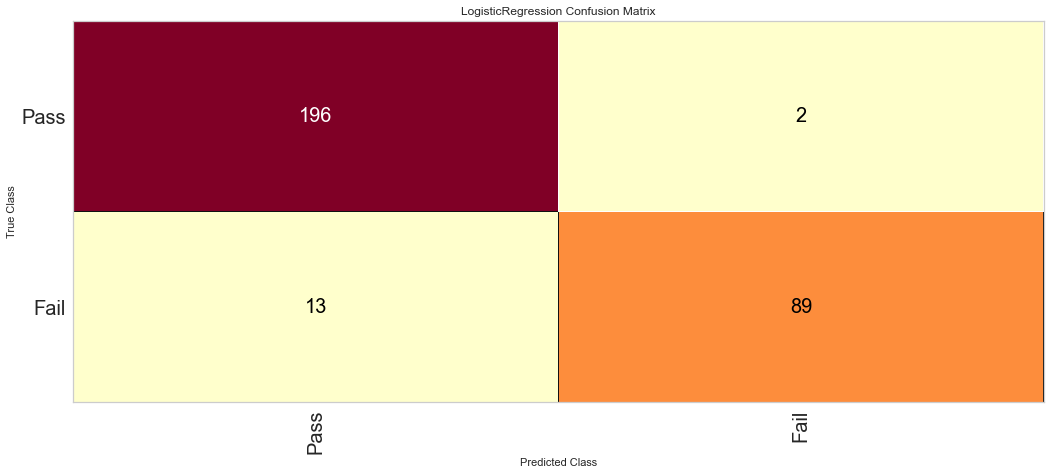

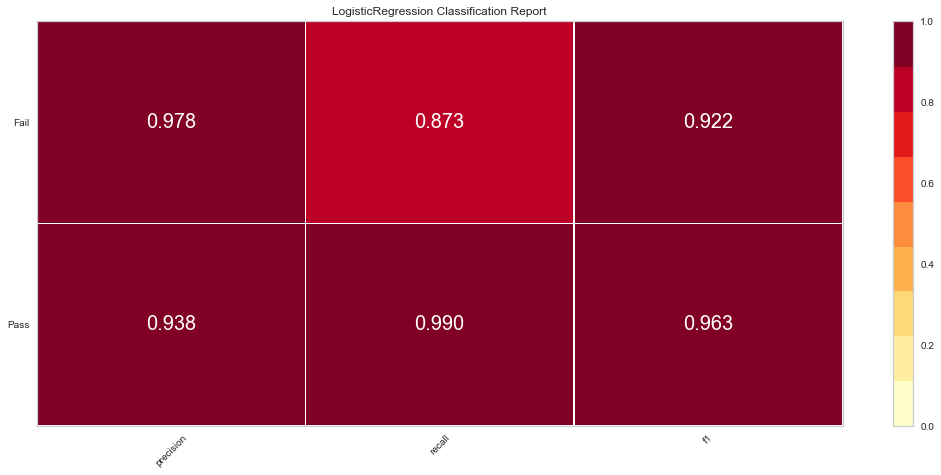

In [52]:
# Step 10 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Fail','Pass']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [59]:
# Step 11 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['math score','reading score','writing score','totalScore']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'grade': {'Pass': 1, 'Fail': 0}})['grade']
#data_model_y = data['grade']  

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Pass and Fail
print('\n')
print('No. of Pass and Fail in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Pass and Fail in the validation set:')
print(y_val.value_counts())
#print(y_val)

No. of samples in training set:  700
No. of samples in validation set: 300


No. of Pass and Fail in the training set:
0    480
1    220
Name: grade, dtype: int64


No. of Pass and Fail in the validation set:
0    198
1    102
Name: grade, dtype: int64


In [67]:
# Step 12 - Fitting a Linear Model to the Data and Evaluating Metrics on the performance
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Instantiate the classification model 
model = LinearRegression().fit(X_train, y_train)
print(f"Accuracy: {round(model.score(X_val, y_val) , 5)*100:0.2f}%")
y_pred = model.predict(X_val)
print("Root mean squared error: ",np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Accuracy: 55.83%
Root mean squared error:  0.3148138310155848
